In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

file ='dataset_for_CaseStudy.xls'

df = pd.read_excel(file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 24 columns):
LeadCreated                    3021 non-null datetime64[ns]
FirstName                      3021 non-null object
Email                          3021 non-null object
VendorLeadID                   3013 non-null object
CallStatus                     881 non-null object
WidgetName                     3021 non-null object
PublisherZoneName              3021 non-null object
PublisherCampaignName          3021 non-null object
AddressScore                   1171 non-null float64
PhoneScore                     1393 non-null float64
AdvertiserCampaignName         3021 non-null object
State                          3021 non-null object
DebtLevel                      3021 non-null object
IP Address                     0 non-null float64
Partner                        3021 non-null object
ReferralDomain                 2506 non-null object
MarketingCampaign              2749 non-null object
Ad

In [14]:
df['Partner']= df['Partner'].str.lower()

## month devleop

df['Month'] = df.LeadCreated.dt.month


In [15]:
df_closed = df[df.CallStatus == 'Closed']


In [16]:
df['WidgetName'].value_counts()

for val in enumerate(df.loc[ : , 'WidgetName']):
     if val[1] == "w-302252-DebtReduction1-1DC-CreditSolutions" or val[1]== 'w-300250-DebtReduction1-1DC-CreditSolutions' :
         df.loc[val[0],'WidgetName'] = 'w-300250-DebtReduction1-1DC-CreditSolutions'
     elif val[1] == "w-302252-DebtReduction1-1DC-white" or val[1]== "w-300250-DebtReduction1-1DC-white" :
         df.loc[val[0],'WidgetName'] = 'w-300250-DebtReduction1-1DC-white'
     elif val[1] == "w-300250-DebtReduction1-1DC" or val[1]== "w-302252-DebtReduction1-1DC" :
         df.loc[val[0],'WidgetName'] = 'w-300250-DebtReduction1-1DC'   
     elif val[1] == "w-302252-DebtReduction1-1DC-yellowarrow-blue" :
         df.loc[val[0],'WidgetName'] = "w-302252-DebtReduction1-1DC-yellowarrow-blue"
     elif val[1] == "w-302252-DebtReduction1-1DC-yellowarrow-dark" :
         df.loc[val[0],'WidgetName'] = "w-302252-DebtReduction1-1DC-yellowarrow-dark"
     elif val[1] == "w-300250-DebtReduction1-1DC-BlueMeter" :
         df.loc[val[0],'WidgetName'] = "w-300250-DebtReduction1-1DC-BlueMeter"
     elif val[1] == "w-300250-DebtReduction1-1DC-Head2 " :
         df.loc[val[0],'WidgetName'] = "w-300250-DebtReduction1-1DC-Head2 "
     elif val[1] == "w-300250-DebtReduction1-2DC-BlueMeter" :
         df.loc[val[0],'WidgetName'] = "w-300250-DebtReduction1-2DC-BlueMeter"
     elif val[1] == "w-300250-DebtReduction1-1DC-Head3" :
         df.loc[val[0],'WidgetName'] = "w-300250-DebtReduction1-1DC-Head3"
     elif val[1] == "w-300250-DebtReduction1-2DC-CreditSolutions" :
         df.loc[val[0],'WidgetName'] = "w-300250-DebtReduction1-2DC-CreditSolutions"
     elif val[1] == "w-302252-DebtReduction1-1DC-yellowarrow" :
         df.loc[val[0],'WidgetName'] = "w-302252-DebtReduction1-1DC-yellowarrow"


In [17]:
#dropping duplicates 8 values has been dropped
df = df.drop_duplicates('VendorLeadID').sort_index()                 
df.shape

(3013, 25)

In [18]:
## fillna with -1 
df['CallStatus'] = df['CallStatus'].fillna("empty") 
df['CallStatus'].value_counts()



empty                                          2139
Closed                                          245
Contacted - Doesn't Qualify                     210
Unable to contact - Bad Contact Information     189
EP Confirmed                                    128
Contacted - Invalid Profile                      84
EP Sent                                          16
EP Received                                       2
Name: CallStatus, dtype: int64

In [19]:

## creating lead quality column 
df['LeadQuality'] = 'default value'
df['CallStatus'].value_counts()
for val in enumerate(df.loc[ : , 'CallStatus']):
     if val[1] == "Closed" or val[1]== 'EP Sent' or val[1]== 'EP Received' or val[1]== 'EP Confirmed':
         df.loc[val[0],'LeadQuality'] = 1
     elif val[1] == "empty":
        df.loc[val[0],'LeadQuality'] = -1
     elif val[1] == "Contacted - Doesn't Qualify" or val[1]== 'Unable to contact - Bad Contact Information' or val[1]== 'Contacted - Invalid Profile' :
         df.loc[val[0],'LeadQuality'] = 0

df['LeadQuality'].value_counts()


-1               2139
0                 483
1                 391
default value       8
Name: LeadQuality, dtype: int64

In [9]:
##creating data frame without mising values in call status 


,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,Month,LeadQuality
2,2009-04-21 07:22:59,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,4.0,0
3,2009-08-03 19:39:02,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-300250-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,8.0,0
7,2009-04-22 16:41:49,John,johndoe333@yahoo.com,hxFrkNSCjU6rE2u-7yH-KQ,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Credit,Debt Credit Services,Credit services,credit services,http://www.google.com/search,q=credit services&rls=com.microsoft:*&ie=UTF-8...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=D...,4.0,0
10,2009-06-01 19:27:57,Juan,villalobosjgv@yahoo.com,LfatQ19SFkWfP3-hH7TVTQ,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7277345023380563&host=pub-155622...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,6.0,0
17,2009-08-01 20:45:14,Kandi,kandielko@verizon.net,7YvjZQLOi0aAT7DhiqDISg,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,3.0,3.0,...,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-3089121361425291&dt=124917730077...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,8.0,0
22,2009-05-14 10:37:19,Charles,hollicj02@yahoo.com,HOqz2SU04UKjPN3Dlu90qg,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,DebtReductionInc,Debt Consolidation,NaN,secured debt consolidation loans,http://search.yahoo.com/search,p=secured debt consolidation loans&fr=yfp-t-50...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,5.0,0
25,2009-04-11 00:00:00,Paul,prince.pdj@gmail.com,xd_FmG9keUa92FAuRcX6ZA,Closed,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Debt Holding Tank,Holding Tank - Debt,Debt stoppers,debt stoppers,http://www.google.com/search,hl=en&q=debt stoppers&aq=f&oq=,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...,4.0,1
33,2009-06-15 18:26:03,Krystle,krystlemorgan@live.com,W_OMDfYIzEOYdqLcebFp9A,Contacted - Doesn't Qualify,w-300250-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Financial Services,Consolidate,NaN,NaN,http://intellimatch.org/c/PR--JRxrQYDNxxo_fxol...,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,6.0,0
42,2009-06-18 00:00:00,Jovetta,jrwmccormick@yahoo.com,HAXhknWAxUOd9PO6Mr-CzA,Closed,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,state,Filing Bankrupcy,NaN,NaN,http://www.lawyer.com/,qq=bankruptcy md,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=s...,6.0,1
43,2009-06-18 00:00:00,J

In [21]:
by_offer_type_df = df.groupby(['CallStatus',"PublisherCampaignName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('PublisherCampaignName').count()['VendorLeadID']

by_offer_type_df = by_offer_type_df.drop("empty")

by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df



PublisherCampaignName,DebtReductionCallCenter,DebtReductionInc
CallStatus,,
Closed,0.095941,0.079533
Contacted - Doesn't Qualify,0.154982,0.061291
Contacted - Invalid Profile,0.044280,0.026268
EP Confirmed,0.062731,0.040496
EP Received,0.000000,0.000730
EP Sent,0.003690,0.005472
Unable to contact - Bad Contact Information,0.044280,0.064575


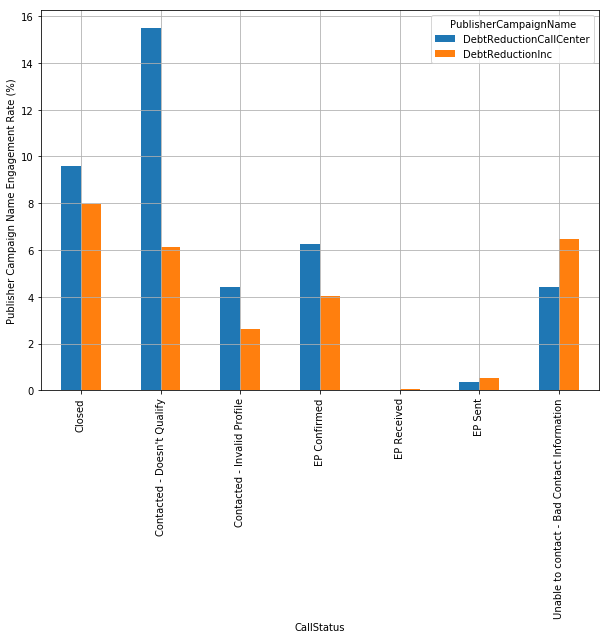

In [35]:
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Publisher Campaign Name Engagement Rate (%)')
plt.show()


In [106]:
by_offer_type_df2 = df.loc[
df['CallStatus'] == 'Closed' # engaged customers
].groupby(['WidgetName',"CallStatus" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('WidgetName').count()['VendorLeadID']

by_offer_type_df2  = by_offer_type_df2.unstack().fillna(0)
by_offer_type_df2




CallStatus,Closed
WidgetName,
w-300250-DebtReduction1-1DC,0.092233
w-300250-DebtReduction1-1DC-BlueMeter,0.141304
w-300250-DebtReduction1-1DC-CreditSolutions,0.077128
w-300250-DebtReduction1-1DC-Head2,0.123596
w-300250-DebtReduction1-1DC-Head3,0.053333
w-300250-DebtReduction1-1DC-white,0.073733
w-300250-DebtReduction1-2DC-BlueMeter,0.068966
w-300250-DebtReduction1-2DC-CreditSolutions,0.080000
w-302252-DebtReduction1-1DC-yellowarrow,0.061224


In [ ]:
ax = (by_offer_type_df2*100.0).plot(
kind='bar',
figsize=(20, 7),
grid=True
)
ax.set_ylabel('Widget Type Success Rate (%)')
plt.show(

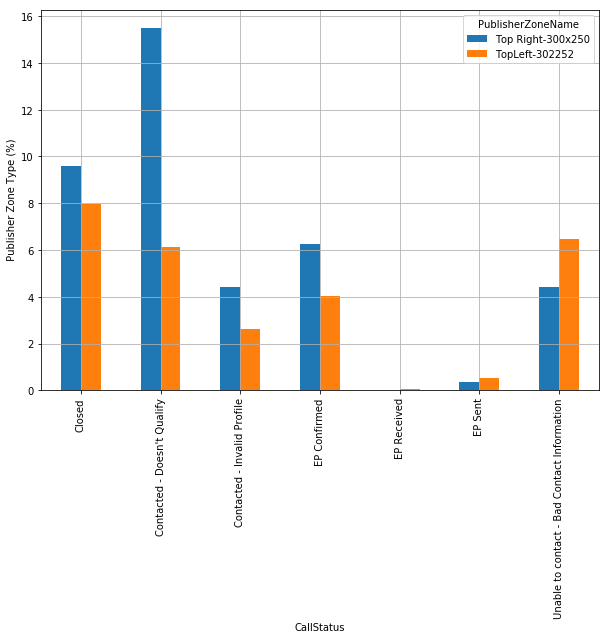

In [97]:
by_offer_type_df3 = df.groupby(['CallStatus',"PublisherZoneName" ]).count()['VendorLeadID'] / df.groupby('PublisherZoneName').count()['VendorLeadID']
by_offer_type_df3 = by_offer_type_df3.drop("empty")

by_offer_type_df3 = by_offer_type_df3.unstack().fillna(0)
by_offer_type_df3


ax = (by_offer_type_df3*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel(' Publisher Zone Type (%)')
plt.show()



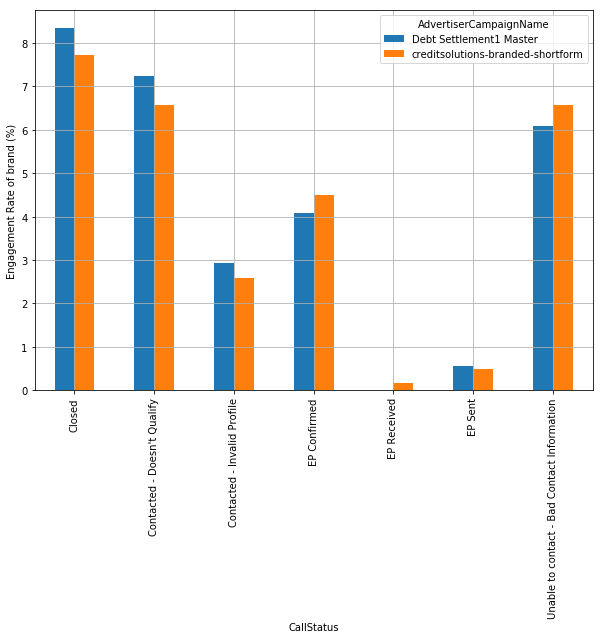

In [99]:
by_offer_type_df4 = df.groupby(['CallStatus',"AdvertiserCampaignName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('AdvertiserCampaignName').count()['VendorLeadID']
by_offer_type_df4 = by_offer_type_df4.drop("empty")

by_offer_type_df4 = by_offer_type_df4.unstack().fillna(0)
by_offer_type_df4


ax = (by_offer_type_df4*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate of brand (%)')
plt.show()

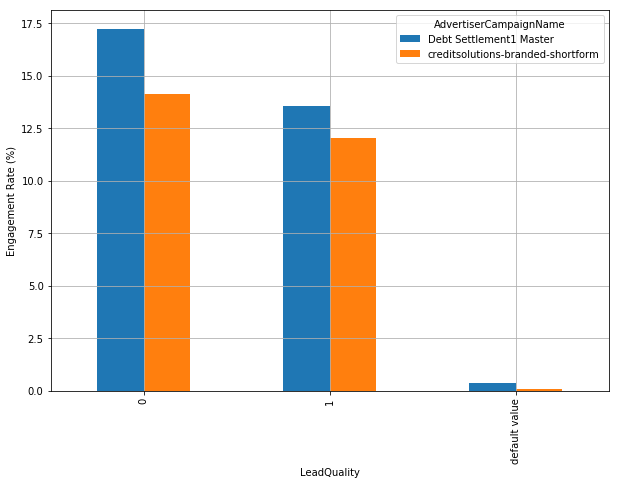

In [40]:
lead_brand = df.groupby(['LeadQuality',"AdvertiserCampaignName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('AdvertiserCampaignName').count()['VendorLeadID']
lead_brand = lead_brand.drop(-1)

lead_brand = lead_brand.unstack().fillna(0)
lead_brand

ax = (lead_brand*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()


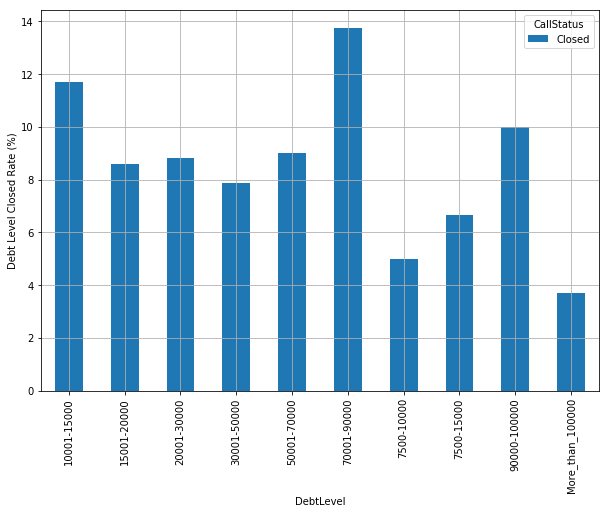

In [103]:
####### Debt level 

by_offer_type_df5 = df.loc[
df['CallStatus'] == 'Closed' # engaged customers
].groupby(['DebtLevel',"CallStatus" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('DebtLevel').count()['VendorLeadID']

by_offer_type_df5 = by_offer_type_df5.unstack().fillna(0)
by_offer_type_df5


ax = (by_offer_type_df5*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Debt Level Closed Rate (%)')
plt.show()

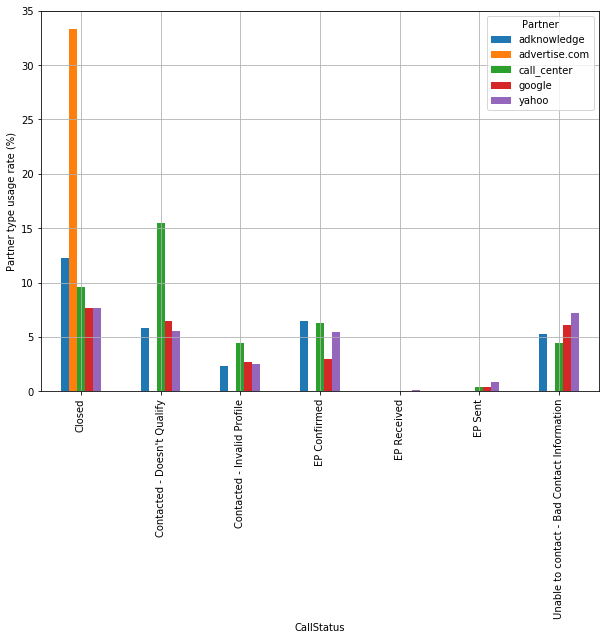

In [101]:
by_offer_type_df6 = df.groupby(['CallStatus',"Partner" 
]).count()['VendorLeadID'] / df.groupby('Partner').count()['VendorLeadID']
by_offer_type_df6 = by_offer_type_df6.drop("empty")

by_offer_type_df6 = by_offer_type_df6.unstack().fillna(0)
by_offer_type_df6

ax = (by_offer_type_df6*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Partner type usage rate (%)')
plt.show()


In [62]:
by_offer_type_df35 = df.loc[
df['CallStatus'] == 'Closed' # engaged customers
].groupby(['MarketingCampaign',"CallStatus" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('MarketingCampaign').count()['VendorLeadID']

by_offer_type_df35 = by_offer_type_df35.unstack().fillna(0)
by_offer_type_df35
by_offer_type_df35 = by_offer_type_df35.set_index('index')

ax = sns.barplot(x="Month", y="MarketingCampaign", data=by_offer_type_df35)


CallStatus,Closed
MarketingCampaign,
Credit,0.120000
Debt,0.333333
Debt Consolidation,0.029412
Debt General,0.060976
Debt Holding Tank,0.145401
Debt Volume,0.090909
Debt Volume_MI,0.200000
Debt Volume_TX,0.142857
DebtReductionInc,0.059264


In [67]:
by_offer_type_df7 = df.loc[
df['CallStatus'] == 'Closed' # engaged customers
].groupby(['MarketingCampaign',"Month" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('MarketingCampaign').count()['VendorLeadID']
by_offer_type_df7 = pd.DataFrame(by_offer_type_df7)
by_offer_type_df7



VendorLeadID
MarketingCampaign                             Month              
Credit                                        4.0        0.030000
                                              5.0        0.020000
                                              6.0        0.030000
                                              7.0        0.010000
                                              8.0        0.030000
Debt                                          5.0        0.333333
Debt Consolidation                            6.0        0.029412
Debt General                                  4.0        0.012195
                                              5.0        0.006098
                                              6.0        0.012195
                                              7.0        0.018293
                                              8.0        0.006098
                                              9.0        0.006098
Debt Holding Tank                             4.0        0.032641
                                              5.0        0.020772
                                              6.0        0.017804
                                              7.0        0.023739
                                              8.0        0.038576
                                              9.0        0.011869
Debt Volume                                   4.0        0.013986
                                              6.0        0.027972
                                              7.0        0.013986
                                              8.0        0.020979
                                              9.0        0.013986
Debt Volume_MI                                8.0        0.200000
Debt Volume_TX                                4.0        0.142857
DebtReductionInc                              4.0        0.016349
                                              5.0        0.010899
                                              6.0        0.018392
                                              7.0        0.006812
                                              8.0        0.004768
                                              9.0        0.002044
DebtReductionInc - YSM Restructure (05/29/09) 6.0        0.045455
Financial Services                            4.0        0.035088
                                              5.0        0.029240
                                              6.0        0.023392
                                              7.0        0.005848
                                              8.0        0.029240
state                                         4.0        0.020833
                                              5.0        0.020833
                                              6.0        0.041667
                                              9.0        0.020833
state - YSM Restructure (05/29/09)            6.0        0.333333

C:\Users\ASUSNB\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


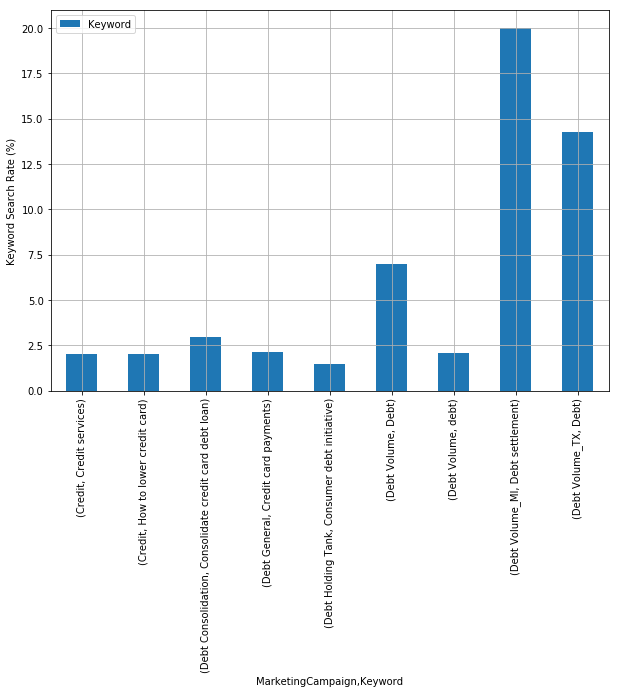

In [102]:
by_offer_type_df8 = df.loc[
df['CallStatus'] == 'Closed' # engaged customers
].groupby(['MarketingCampaign',"Keyword" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('MarketingCampaign').count()['VendorLeadID']


by_offer_type_df8.describe()
by_offer_type_df8 = pd.DataFrame(by_offer_type_df8)
by_offer_type_df8['Keyword_success'] = by_offer_type_df8['VendorLeadID'].apply(
lambda x: 'High' if x > by_offer_type_df8['VendorLeadID'].mean() else 'Low'
)

by_offer_type_df8_update = by_offer_type_df8[by_offer_type_df8.Keyword_success == 'High']

del by_offer_type_df8_update['Keyword_success']

by_offer_type_df8_update['Keyword' ] = by_offer_type_df8_update['VendorLeadID']
del by_offer_type_df8_update['VendorLeadID']

ax = (by_offer_type_df8_update*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Keyword Search Rate (%)')
plt.show()



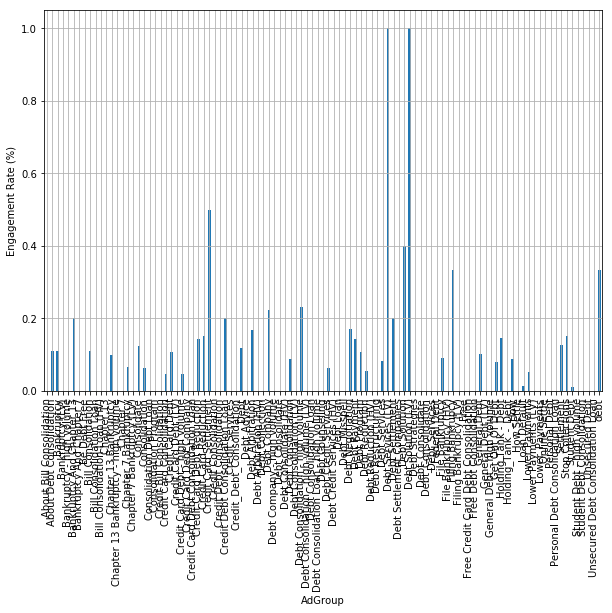

In [36]:
by_offer_type_df20 = df.loc[
df['CallStatus'] == 'Closed'].groupby(['AdGroup' # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('AdGroup').count()['VendorLeadID']
by_offer_type_df20

ax = (by_offer_type_df20).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

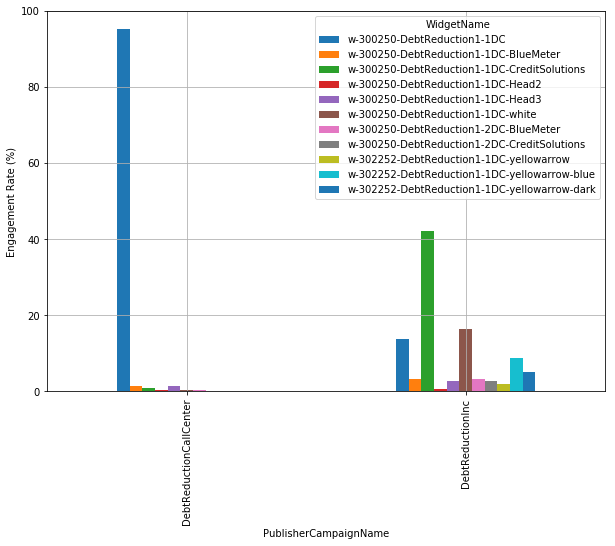

WidgetName                                    PublisherCampaignName  
w-300250-DebtReduction1-1DC                   DebtReductionCallCenter    0.952030
                                              DebtReductionInc           0.136811
w-300250-DebtReduction1-1DC-BlueMeter         DebtReductionCallCenter    0.014760
                                              DebtReductionInc           0.032470
w-300250-DebtReduction1-1DC-CreditSolutions   DebtReductionCallCenter    0.007380
                                              DebtReductionInc           0.420649
w-300250-DebtReduction1-1DC-Head2             DebtReductionCallCenter    0.003690
                                              DebtReductionInc           0.004743
w-300250-DebtReduction1-1DC-Head3             DebtReductionCallCenter    0.014760
                                              DebtReductionInc           0.026633
w-300250-DebtReduction1-1DC-white             DebtReductionCallCenter    0.003690
                            

In [48]:
## which widgets lead customers to fill online and which widgets made them call? 
by_offer_type_df10 = df.groupby(['PublisherCampaignName',"WidgetName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('PublisherCampaignName').count()['VendorLeadID']


by_offer_type_df10 = by_offer_type_df10.unstack().fillna(0)
by_offer_type_df10

ax = (by_offer_type_df10*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

by_offer_type_df11 = df.groupby(['PublisherCampaignName',"WidgetName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('PublisherCampaignName').count()['VendorLeadID']

by_offer_type_df11 = by_offer_type_df10.unstack().fillna(0)
by_offer_type_df11


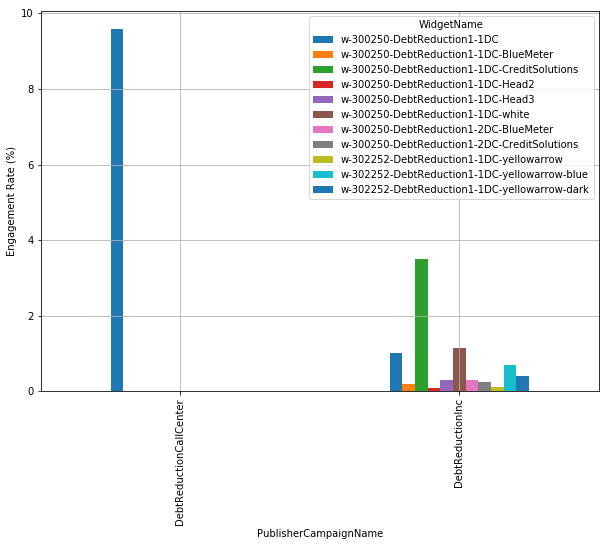

In [49]:
##which widgets lead to closed lead quality through publisher campaign name 
by_offer_type_df12 = df.loc[
df['CallStatus'] == 'Closed' # engaged customers
].groupby(['PublisherCampaignName',"WidgetName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df.groupby('PublisherCampaignName').count()['VendorLeadID']


by_offer_type_df12= by_offer_type_df12.unstack().fillna(0)
by_offer_type_df12


ax = (by_offer_type_df12*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()


In [52]:
by_offer_type_df5.describe()

cum_mean_std =  0.085059 + 0.029704
by_offer_type_df5['DebtLevel_Segment'] = by_offer_type_df5['Closed'].apply(
lambda x: 'High' if x > cum_mean_std else 'Low'
)

## optimal debt levellar = 10000 - 15000 & 70000 -90000


In [53]:
optimal_debts = df_closed[(df_closed['DebtLevel']== "10001-15000") |  (df_closed['DebtLevel'] == "70001-90000")]

by_offer_type_df14= optimal_debts.groupby(['Partner',"AdvertiserCampaignName" # grouping the data by these two columns
]).count()['VendorLeadID'] / df_closed.groupby('AdvertiserCampaignName').count()['VendorLeadID']

by_offer_type_df14  = by_offer_type_df14.unstack().fillna(0)
by_offer_type_df14

by_offer_type_df14.append(by_offer_type_df14.sum().rename('Total')).assign(Total=lambda d: d.sum(1))

AdvertiserCampaignName,Debt Settlement1 Master,creditsolutions-branded-shortform,Total
Partner,,,
adknowledge,0.006623,0.021505,0.028128
call_center,0.039735,0.000000,0.039735
google,0.092715,0.129032,0.221747
yahoo,0.052980,0.096774,0.149754
Total,0.192053,0.247312,0.439365


In [55]:
by_offer_type_df15 = optimal_debts.groupby(['State',"DebtLevel" # grouping the data by these two columns
]).count()['VendorLeadID'] / optimal_debts.groupby('DebtLevel').count()['VendorLeadID']

by_offer_type_df15  = by_offer_type_df15.unstack().fillna(0)
by_offer_type_df15



DebtLevel,10001-15000,70001-90000
State,,
AL,0.058824,0.000000
AR,0.029412,0.000000
AZ,0.000000,0.111111
CA,0.088235,0.111111
CO,0.029412,0.055556
FL,0.088235,0.111111
HI,0.029412,0.000000
IL,0.117647,0.055556
LA,0.058824,0.000000


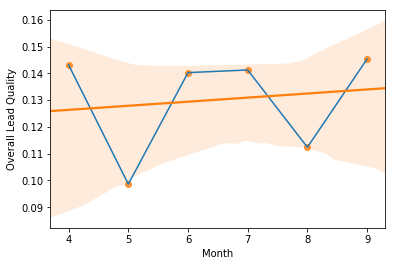

In [42]:
by_offer_type_df16 = df.loc[
df['LeadQuality'] == 1# engaged customers
].groupby(['Month']).count()['VendorLeadID'] / df.groupby('Month').count()['VendorLeadID']

by_offer_type_df16 = pd.DataFrame(by_offer_type_df16)
by_offer_type_df16["Overall Lead Quality"]= by_offer_type_df16['VendorLeadID']

by_offer_type_df16.reset_index(inplace=True)

ax = sns.lineplot(x="Month", y="Overall Lead Quality", data=by_offer_type_df16)
sns.regplot(x="Month", y="Overall Lead Quality", data=by_offer_type_df16)


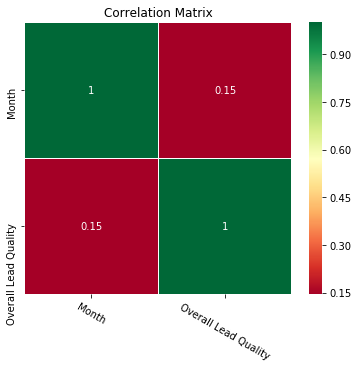

In [43]:
corr_data = by_offer_type_df16[['Month','Overall Lead Quality']]
corr = corr_data.corr()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [90]:
by_offer_type_df17 = df_closed.groupby(['Month']).count()['VendorLeadID'] / df.groupby('Month').count()['VendorLeadID']

by_offer_type_df17 = pd.DataFrame(by_offer_type_df17)
by_offer_type_df17["Closed"]= by_offer_type_df17['VendorLeadID']
by_offer_type_df17.columns
by_offer_type_df17.reset_index(inplace=True)

by_offer_type_df17.head()



,Month,VendorLeadID,Closed
0,4,0.106383,0.106383
1,5,0.064014,0.064014
2,6,0.103960,0.103960
3,7,0.062147,0.062147
4,8,0.094037,0.094037


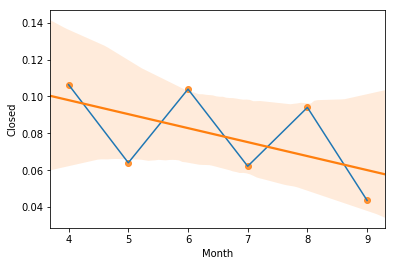

In [91]:

ax = sns.lineplot(x="Month", y="Closed", data=by_offer_type_df17)

sns.regplot(x="Month", y="Closed", data=by_offer_type_df17)

In [22]:
#3.  If the advertiser says they will increase our CPL by 20% (i.e., $30 to $36) if we increase our lead quality by 20% (i.e., from 8.0% to 9.6%), do we see any opportunities to do that here?  What kinds of things could we do?

empty_leads = df[(df['CallStatus'] == "empty")] 
empty_leads.shape


(2139, 26)

In [23]:
optimal_debt_levels_emptyleads = empty_leads[(empty_leads['DebtLevel']== "10001-15000") |  (empty_leads['DebtLevel'] == "70001-90000")]

In [24]:
optimal_debt_levels_emptyleads

(278, 26)

In [25]:
optimal_debt_levels_emptyleads['State'].value_counts()

CA    36
TX    33
NY    30
FL    23
MI    19
IL    18
VA    15
PA    12
CO    11
MD     9
MO     7
AZ     7
AL     7
LA     6
MA     6
WA     5
OR     4
WV     4
NM     4
CT     4
NV     3
OK     3
NE     2
IA     2
AR     2
HI     2
IN     2
MT     1
SD     1
Name: State, dtype: int64

In [26]:
optimal_debt_levels_emptyleads['PublisherCampaignName'].value_counts()

DebtReductionInc           252
DebtReductionCallCenter     26
Name: PublisherCampaignName, dtype: int64

In [27]:
optimal_debt_levels_emptyleads['Partner'].value_counts()

google           166
yahoo             70
call_center       26
adknowledge       15
advertise.com      1
Name: Partner, dtype: int64

In [28]:
optimal_debt_levels_emptyleads['AdvertiserCampaignName'].value_counts()

Debt Settlement1 Master              165
creditsolutions-branded-shortform    113
Name: AdvertiserCampaignName, dtype: int64